#### Loading libraries

In [5]:
# loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to display all the output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Downloading dataset

In [1]:
# dataset download for windows pc
!curl http://www.ece.uah.edu/~thm0009/icsdatasets/binaryAllNaturalPlusNormalVsAttacks.7z --output data\\binaryAllNaturalPlusNormalVsAttacks.7z
!7z e data\\binaryAllNaturalPlusNormalVsAttacks.7z
!dir data\\binaryAllNaturalPlusNormalVsAttacks

'7z' is not recognized as an internal or external command,
operable program or batch file.


####  Loading data to dataframe

In [121]:
# reading the first file of the dataset
df = pd.read_csv('data\\binary-all-natural-plus-normal-vs-attacks\data1.csv')
df.shape

(4966, 129)

#### Handling nan

In [122]:
# Checking the NA, inf columns
df = df.replace([np.inf, -np.inf], np.nan)
na_cnt = df.isnull().sum()
na_cnt[na_cnt!=0]

R1-PA:Z    192
R2-PA:Z    170
R3-PA:Z    153
R4-PA:Z    150
dtype: int64

#### Supporting functions

In [172]:
# supporting funcions
import math
def eda_feature_category(df,cols,nrows=0,ncols=3):
    """ print the first five rows of the filtered features, 
    statistical measures and plot the values over the row number
    
    Parameters
    ----------
    df: full dataframe
    cols: list of column names
    """ 
    dfl =  df[cols]
    
    if nrows == 0:
        nrows = math.ceil(dfl.shape[1]/3)

    fig, axs = plt.subplots(figsize=(20, 3*nrows),nrows=nrows,ncols=ncols)
    
    for ax,col in enumerate(list(dfl)):
        axs[ax//ncols][ax%ncols].plot(dfl.index, dfl[col].values)
        axs[ax//ncols][ax%ncols].set_title(col)
        plt.tight_layout()

import re
col_names = list(df)

def get_col_names(col_names,regex_str):
    regex = re.compile(regex_str)
    return(list(filter(regex.search, col_names)))

### Phase A - C Voltage Phase Angle

We can observe some of the 0 values which could be the missing values.

R1-PA1:VH    R1-PA2:VH    R1-PA3:VH    R2-PA1:VH    R2-PA2:VH  \
count  4966.000000  4966.000000  4966.000000  4966.000000  4966.000000   
mean    -17.925492     8.610555     1.681621   -20.293431    11.543334   
std      98.099812   115.044643    96.408966    98.783603   113.386596   
min    -179.988962  -179.994691  -179.960314  -179.679565  -179.975280   
25%     -97.404258   -99.085889   -77.405166  -101.221589   -93.810380   
50%     -35.864293    17.077007    14.080438   -40.465394    22.392392   
75%      71.277382   116.783123    77.995312    65.718743   113.998548   
max     179.994691   179.971773   179.966044   179.610810   179.980785   

         R2-PA3:VH    R3-PA1:VH    R3-PA2:VH    R3-PA3:VH    R4-PA1:VH  \
count  4966.000000  4966.000000  4966.000000  4966.000000  4966.000000   
mean     -0.248370   -20.285672    11.533544    -0.242169   -18.006717   
std      95.442680    98.780198   113.383496    95.448522    98.301944   
min    -179.805615  -179.708212  -179.988962  -179.839993  -179.914860   
25%     -75.283789  -101.212994   -93.753084   -75.293816   -97.130131   
50%       7.840927   -40.436496    22.365408     7.792226   -35.678992   
75%      72.874502    65.756934   113.965603    72.847286    71.495106   
max     179.848949   179.685294   179.966044   179.885829   179.960314   

         R4-PA2:VH    R4-PA3:VH  
count  4966.000000  4966.000000  
mean      9.561819     2.612514  
std     115.189124    95.834892  
min    -179.964297  -179.975280  
25%     -95.892735   -74.866963  
50%      18.632813    14.705200  
75%     117.683477    78.579713  
max     179.975280   179.969788

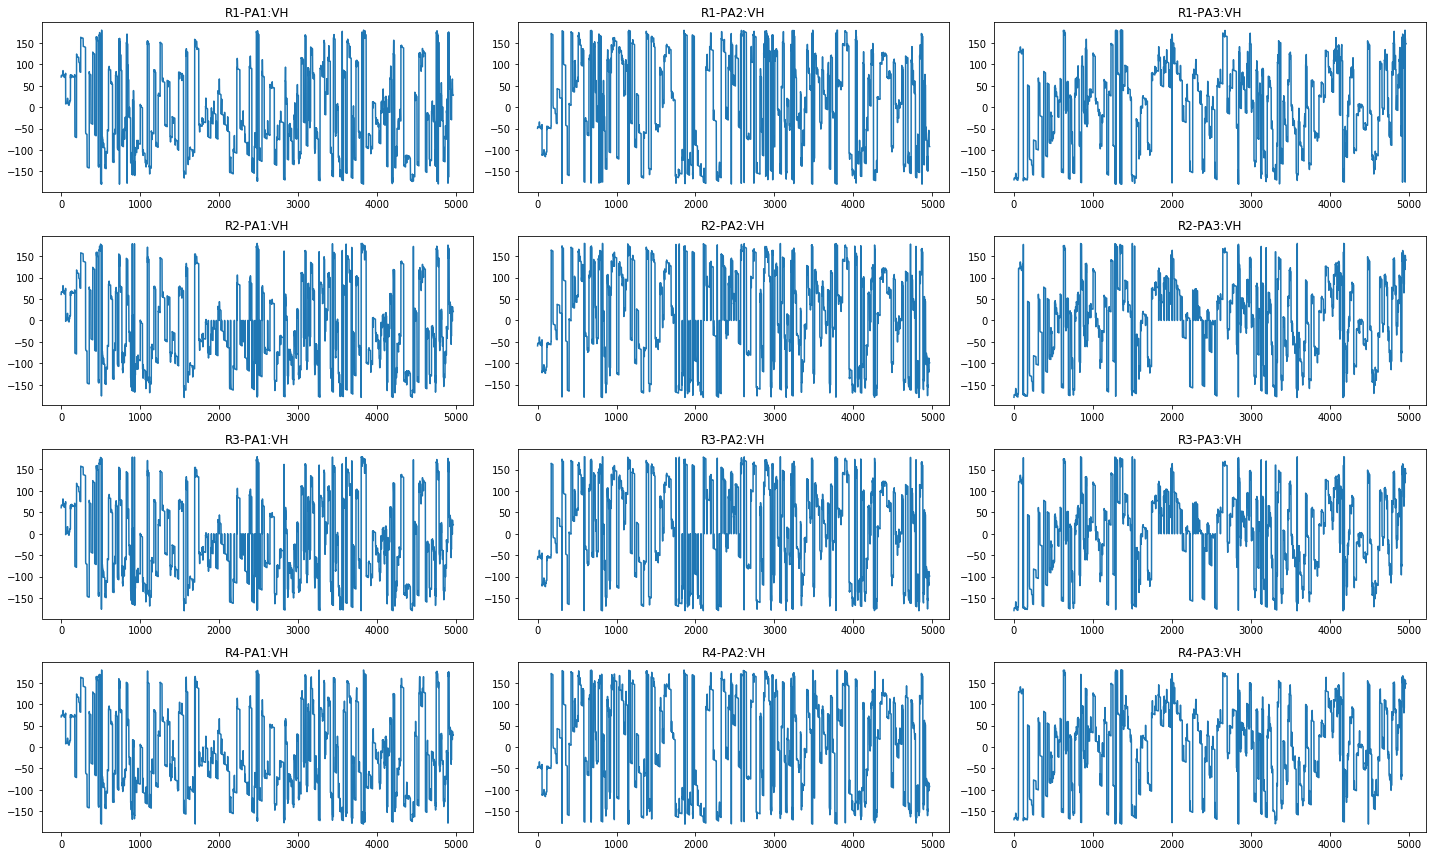

In [170]:
cols = get_col_names(col_names,'R[1-4]-PA[1-4]:VH')

eda_feature_category(df,cols)
df[cols].describe() 

### Phase A - C Voltage Phase Magnitude

* We can observe zero values which could be the missing values. They can be filled using average
* we can log transform the data if we are using neural network

R1-PM1:V       R1-PM2:V       R1-PM3:V       R2-PM1:V  \
count    4966.000000    4966.000000    4966.000000    4966.000000   
mean   130994.354960  131258.159486  131575.619600  128131.576089   
std      6545.849798    2692.553537    2772.274253   11293.553959   
min     24998.050190  102449.381200   98161.852050    8023.446400   
25%    131007.835800  130706.956500  131064.250625  128762.210950   
50%    131634.667500  131333.788300  131684.814000  129859.492200   
75%    132136.132900  131835.253700  132211.352700  130872.025375   
max    146302.530500  146327.603700  146452.970100  144151.406300   

            R2-PM2:V       R2-PM3:V       R3-PM1:V       R3-PM2:V  \
count    4966.000000    4966.000000    4966.000000    4966.000000   
mean   129002.459742  129335.574588  127943.807560  128732.182295   
std      4872.083721    4535.294353   11277.184866    4864.588596   
min      2381.960650    7597.200810    8048.519670    2381.960650   
25%    128738.189475  128876.607800  128600.801800  128525.582000   
50%    129804.318800  129929.685100  129704.025700  129553.586100   
75%    130805.800800  130913.599600  130631.736700  130431.150500   
max    143986.218800  150629.515600  143644.763800  143594.617300   

            R3-PM3:V       R4-PM1:V       R4-PM2:V       R4-PM3:V  
count    4966.000000    4966.000000    4966.000000    4966.000000  
mean   129145.730296  131144.450629  131332.513579  131741.744440  
std      4526.814871    7339.091748    3711.672947    3681.155677  
min      7622.274080   18043.203130   20998.910160   15906.980470  
25%    128701.094900  131291.503925  130957.689200  131371.242200  
50%    129804.318800  131885.400200  131563.351600  131960.620000  
75%    130706.956500  132411.938900  132187.175775  132484.781300  
max    150038.447700  148143.296900  148116.796900  148414.546900

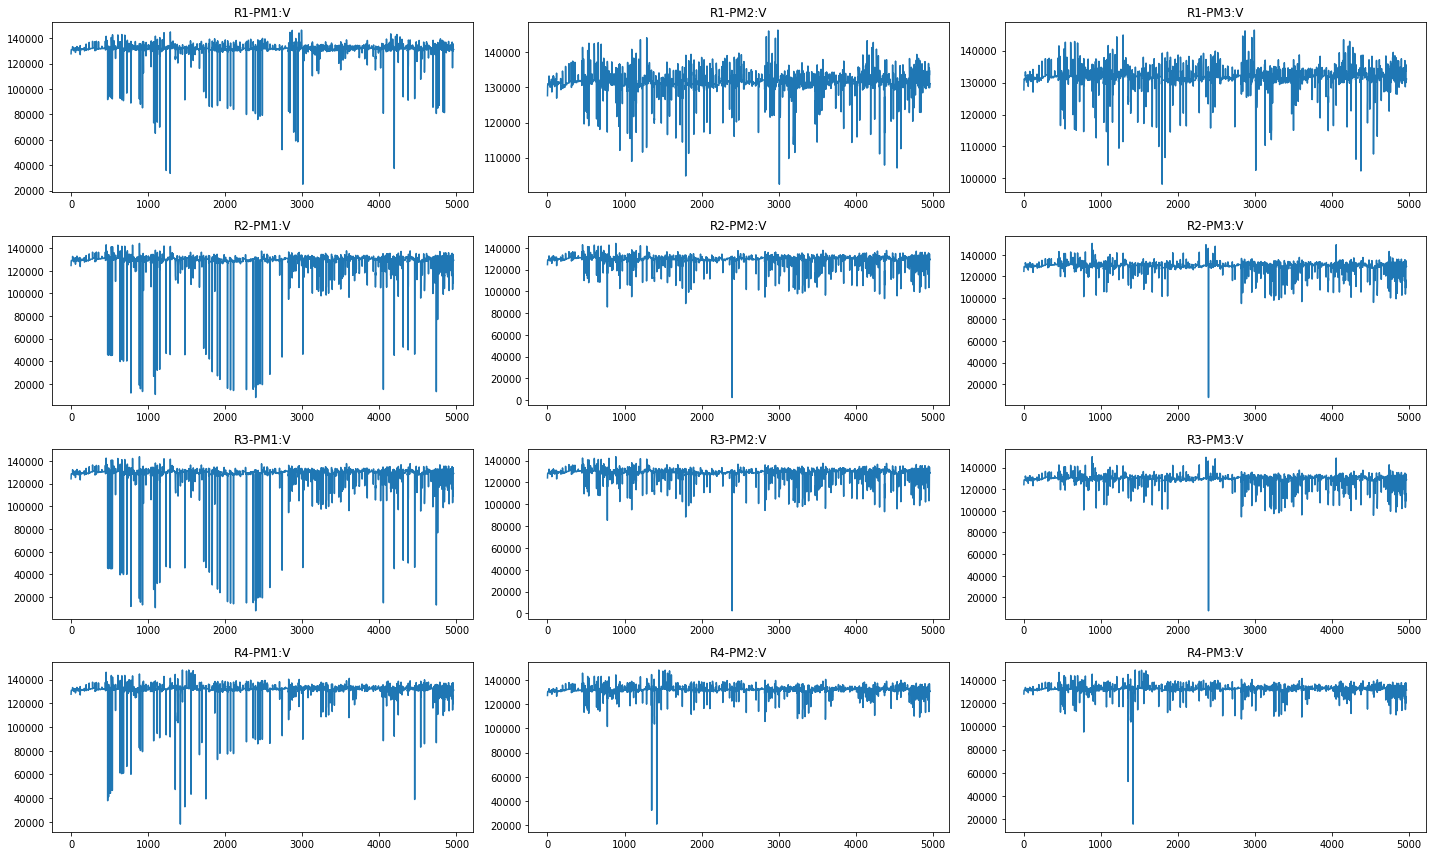

In [125]:
cols = get_col_names(col_names,'[1-4]-PM[1-4]:V')

#df[cols]=df[cols].replace(0,np.nan)
#df[cols]=df[cols].fillna(df[cols].mean())

eda_feature_category(df,cols)
df[cols].describe()

### Phase A - C Current Phase Angle

R1-PA4:IH    R1-PA5:IH    R1-PA6:IH    R2-PA4:IH    R2-PA5:IH  \
count  4966.000000  4966.000000  4966.000000  4966.000000  4966.000000   
mean    -17.467920    10.507730     1.105267    18.502837    -4.804446   
std      97.437891   111.699778    94.601895    98.454242    93.295929   
min    -179.988962  -179.736860  -179.943125  -179.986276  -179.662376   
25%     -97.626279   -90.269501   -70.796098   -64.388997   -74.255219   
50%     -33.369062     6.720795     7.585961    32.844806    -9.542612   
75%      67.545994   115.522615    75.242250   102.340289    63.300479   
max     179.925936   179.988962   179.988962   179.994691   179.811345   

         R2-PA6:IH    R3-PA4:IH    R3-PA5:IH    R3-PA6:IH    R4-PA4:IH  \
count  4966.000000  4966.000000  4966.000000  4966.000000  4966.000000   
mean    -14.196781    17.820823    -5.777251   -15.847587   -18.024853   
std     110.168244    99.376112    92.811435   110.221996    97.629413   
min    -179.988962  -179.994691  -179.920207  -179.966044  -179.876406   
25%    -114.378132   -65.218353   -74.786749  -115.469617   -97.945862   
50%      -8.497925    33.128420   -10.261674   -13.023331   -35.148012   
75%      81.511841   102.493555    61.488398    80.777022    67.287765   
max     179.937396   179.977503   179.977503   179.994691   179.937396   

         R4-PA5:IH    R4-PA6:IH  
count  4966.000000  4966.000000  
mean     10.077087     1.628900  
std     112.790363    94.568184  
min    -179.977503  -179.988962  
25%     -92.917998   -71.559564  
50%      15.158387     9.706421  
75%     115.381166    75.929263  
max     179.943125   179.892894

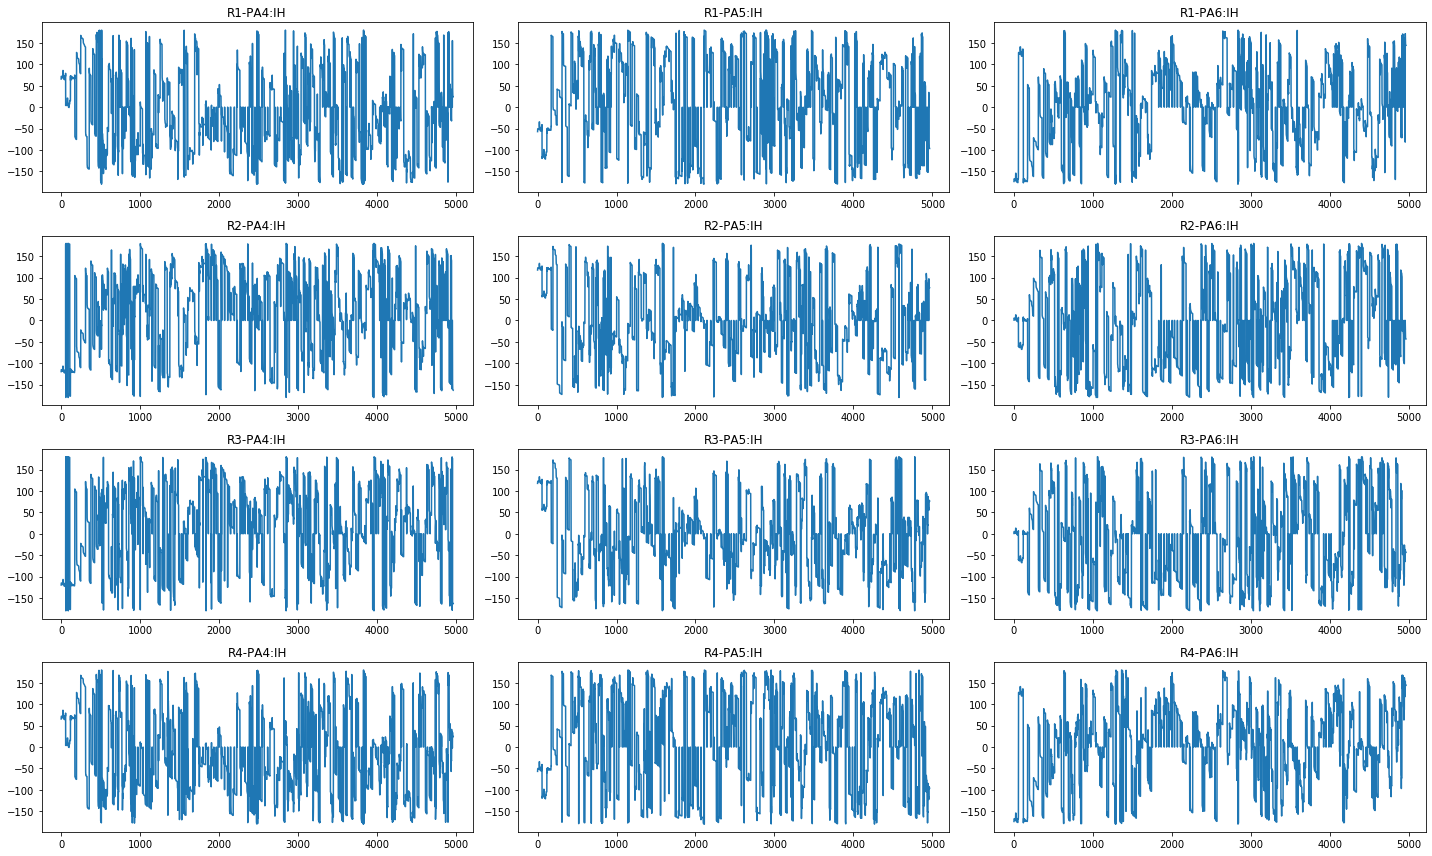

In [126]:
cols = get_col_names(col_names,'R[1-4]-PA[4-6]:IH')

eda_feature_category(df,cols)
df[cols].describe()

### Phase A - C Current Phase Magnitude

R1-PM4:I     R1-PM5:I     R1-PM6:I     R2-PM4:I     R2-PM5:I  \
count  4966.000000  4966.000000  4966.000000  4966.000000  4966.000000   
mean    397.526132   390.915035   386.146542   398.358632   396.048302   
std     181.156073   143.141274   145.960163   165.419038   144.029374   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     317.146520   325.844245   313.346988   320.947237   328.083872   
50%     389.658080   391.855400   387.735425   393.937119   397.020478   
75%     464.321182   469.127820   461.254090   469.310930   474.442009   
max    1771.039920  1263.642110  1259.796800  1412.263916  1274.445600   

          R2-PM6:I     R3-PM4:I     R3-PM5:I     R3-PM6:I     R4-PM4:I  \
count  4966.000000  4966.000000  4966.000000  4966.000000  4966.000000   
mean    391.309950   398.945769   397.827161   391.043241   398.255987   
std     147.007575   167.315997   146.880241   149.638956   185.331451   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     317.423347   320.625610   330.696660   318.245180   316.597190   
50%     392.677404   391.855400   394.602050   390.207410   387.395877   
75%     467.395347   468.578490   474.071790   466.335392   463.628791   
max    1270.417180  1401.157720  1256.500820  1253.387950  1761.039795   

          R4-PM5:I     R4-PM6:I  
count  4966.000000  4966.000000  
mean    393.116855   387.352702  
std     145.890185   147.519142  
min       0.000000     0.000000  
25%     326.485130   313.993489  
50%     390.143387   386.337300  
75%     469.519608   461.620310  
max    1245.697330  1241.485800

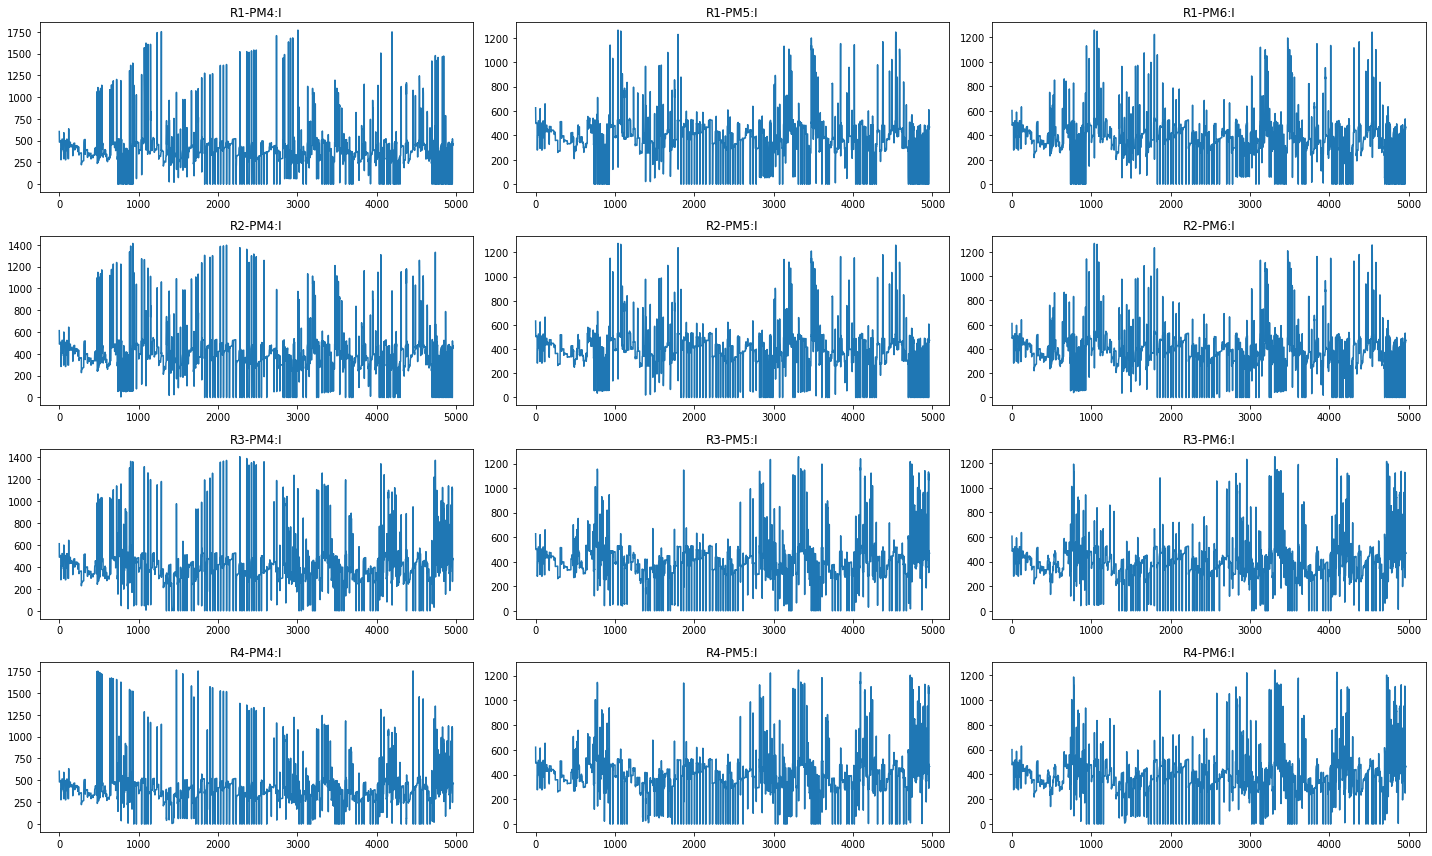

In [127]:
cols = get_col_names(col_names,'R[1-4]-PM[4-6]:I')

eda_feature_category(df,cols)
df[cols].describe()

### Pos. – Neg. – Zero Voltage Phase Angle

R1-PA7:VH    R1-PA8:VH    R1-PA9:VH    R2-PA7:VH    R2-PA8:VH  \
count  4966.000000  4966.000000  4966.000000  4966.000000  4966.000000   
mean    -17.983890     0.607969     0.620987   -20.223110     0.721473   
std      98.084879    12.047386    11.364904    98.876574    11.233006   
min    -179.994691  -176.929367  -174.213547  -179.656646  -173.048402   
25%     -97.434338     0.000000     0.000000  -101.197818     0.000000   
50%     -35.852834     0.000000     0.000000   -40.492012     0.000000   
75%      71.264491     0.000000     0.000000    65.912480     0.000000   
max     179.903018   173.411406   178.871694   179.711607   171.944275   

         R2-PA9:VH    R3-PA7:VH    R3-PA8:VH    R3-PA9:VH    R4-PA7:VH  \
count  4966.000000  4966.000000  4966.000000  4966.000000  4966.000000   
mean      0.497517   -20.221780     0.721430     0.498825   -17.987513   
std       9.942779    98.873861    11.237268     9.953914    98.305145   
min    -174.981311  -179.691024  -173.623401  -175.118820  -179.897289   
25%       0.000000  -101.221589     0.000000     0.000000   -97.102662   
50%       0.000000   -40.447956     0.000000     0.000000   -35.659530   
75%       0.000000    65.923092     0.000000     0.000000    71.505133   
max     171.982729   179.725401   171.640967   173.760910   179.971773   

         R4-PA8:VH    R4-PA9:VH  
count  4966.000000  4966.000000  
mean      0.655535     0.694917  
std      11.316151    10.703083  
min    -169.778854  -162.693795  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max     176.327762   169.675600

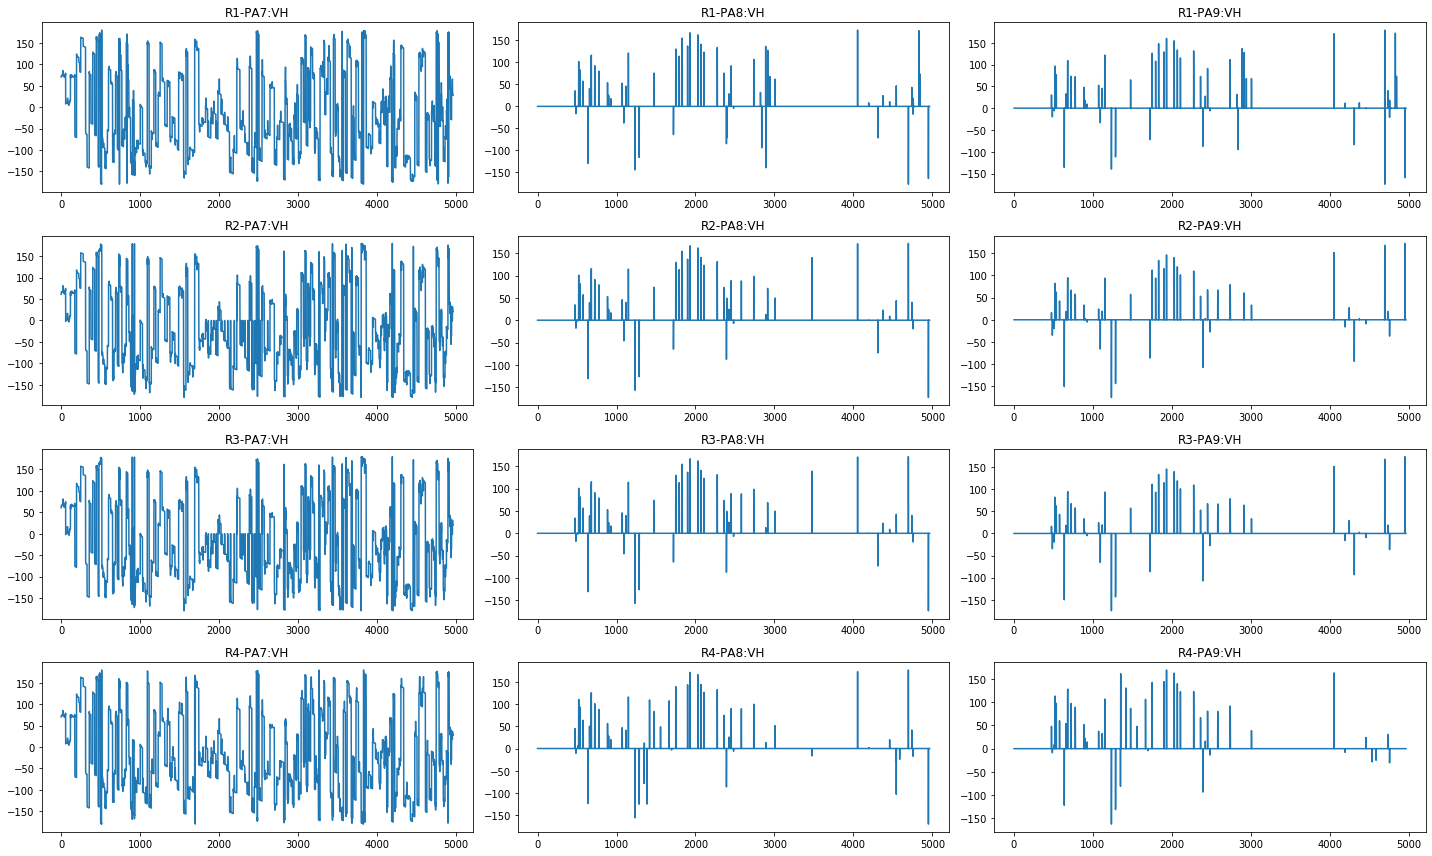

In [128]:
cols = get_col_names(col_names,'R[1-4]-PA[7-9]:VH')

eda_feature_category(df,cols)
df[cols].describe()

### Pos. – Neg. – Zero Voltage Phase Magnitude 

R1-PM7:V      R1-PM8:V      R1-PM9:V       R2-PM7:V      R2-PM8:V  \
count    4966.000000   4966.000000   4966.000000    4966.000000   4966.000000   
mean   131268.580596    272.902802     72.710463  127285.256796    349.062544   
std      3797.129150   2449.012530    752.492395   15220.542243   3143.946711   
min     80058.951110      0.000000      0.000000       0.000000      0.000000   
25%    130932.615900      0.000000      0.000000  128751.241500      0.000000   
50%    131509.301200      0.000000      0.000000  129854.465300      0.000000   
75%    132060.913100      0.000000      0.000000  130857.396100      0.000000   
max    146352.677000  39139.374470  16046.892800  144122.562500  33773.694690   

           R2-PM9:V       R3-PM7:V      R3-PM8:V      R3-PM9:V       R4-PM7:V  \
count   4966.000000    4966.000000   4966.000000   4966.000000    4966.000000   
mean     370.014835  127072.049322    348.112514    369.444485  131399.063965   
std     3510.044178   15195.407480   3135.482682   3504.219334    4641.574706   
min        0.000000       0.000000      0.000000      0.000000   17958.628910   
25%        0.000000  128600.801800      0.000000      0.000000  131203.796900   
50%        0.000000  129678.952400      0.000000      0.000000  131810.180400   
75%        0.000000  130581.590200      0.000000      0.000000  132361.792300   
max    49135.671880  143644.763800  33748.621420  49018.242850  148215.468800   

           R4-PM8:V      R4-PM9:V  
count   4966.000000   4966.000000  
mean     271.888343     82.512722  
std     2550.093797    857.470889  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    38344.027340  15340.970700

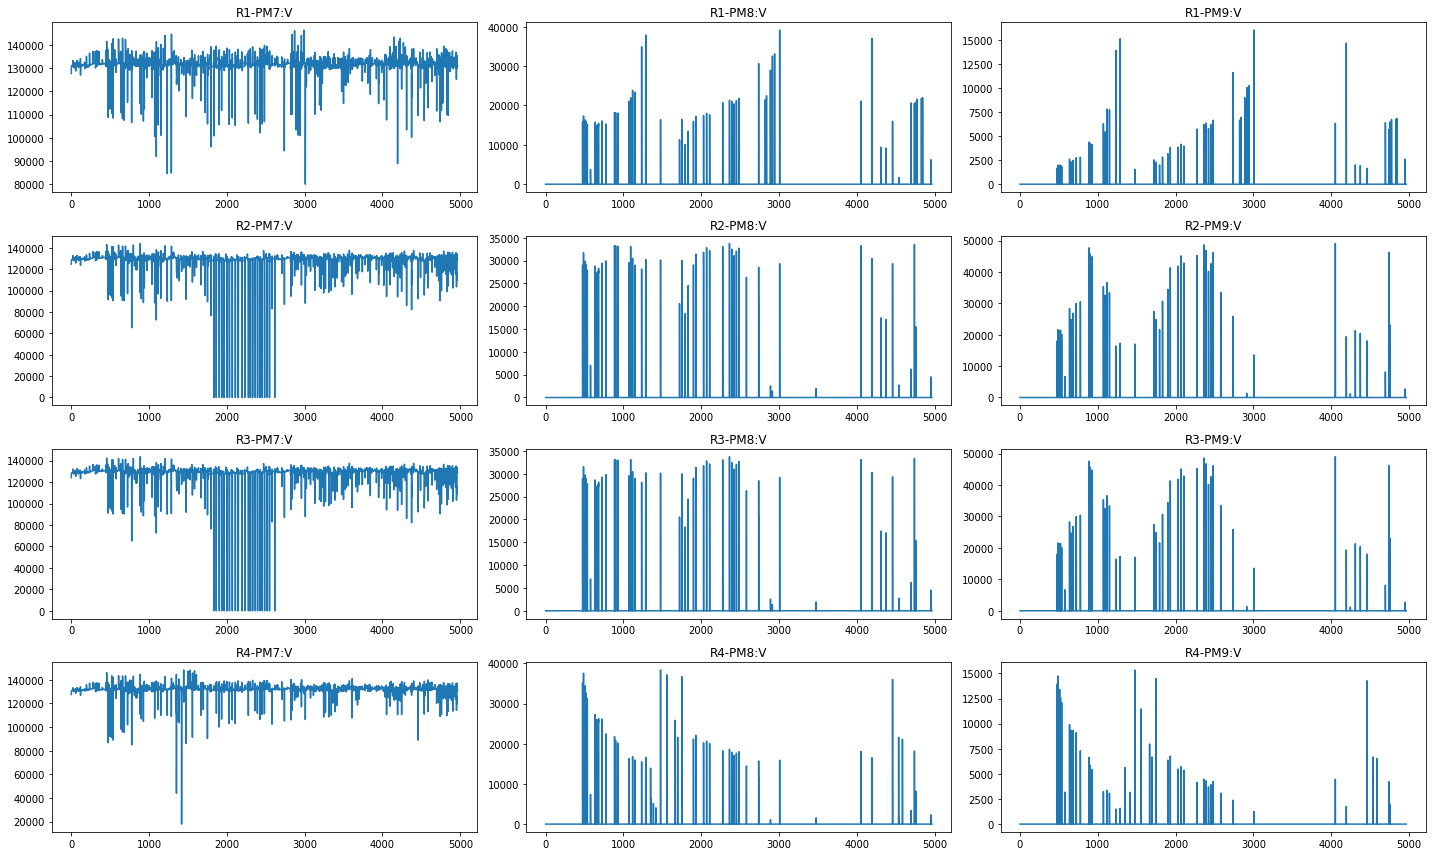

In [129]:
cols = get_col_names(col_names,'R[1-4]-PM[7-9]:V')

eda_feature_category(df,cols)
df[cols].describe()

### Pos. – Neg. – Zero Current Phase Angle

R1-PA10:IH   R1-PA11:IH   R1-PA12:IH   R2-PA10:IH   R2-PA11:IH  \
count  4966.000000  4966.000000  4966.000000  4966.000000  4966.000000   
mean    -17.601948     0.221965    10.614288    19.111578     1.569747   
std      97.455748    68.241895    73.852527    98.226598    77.149180   
min    -179.994691  -179.118066  -179.891559  -179.986276  -179.837952   
25%     -97.397096     0.000000     0.000000   -63.442184     0.000000   
50%     -33.775862     0.000000     0.000000    33.609696     0.000000   
75%      67.210814     0.000000    32.039800   102.469486     0.385314   
max     179.954584   179.725401   179.656646   179.997259   179.931334   

        R2-PA12:IH   R3-PA10:IH   R3-PA11:IH   R3-PA12:IH   R4-PA10:IH  \
count  4966.000000  4966.000000  4966.000000  4966.000000  4966.000000   
mean     -6.839238    19.444468     0.565690    -7.607187   -18.268542   
std      71.446252    98.836416    77.793992    72.456217    97.572875   
min    -179.811345  -179.988962  -179.966044  -179.943125  -179.761058   
25%     -26.401895   -62.631449     0.000000   -29.729348   -97.524987   
50%       0.000000    34.663947     0.000000     0.000000   -35.437230   
75%       0.000000   102.930436     0.000000     0.000000    66.889958   
max     179.947822   179.983232   179.547784   179.977503   179.991768   

        R4-PA11:IH   R4-PA12:IH  
count  4966.000000  4966.000000  
mean     -0.190474    10.603960  
std      67.276416    73.697702  
min    -179.936839  -179.678658  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000    31.516132  
max     179.662170   179.822804

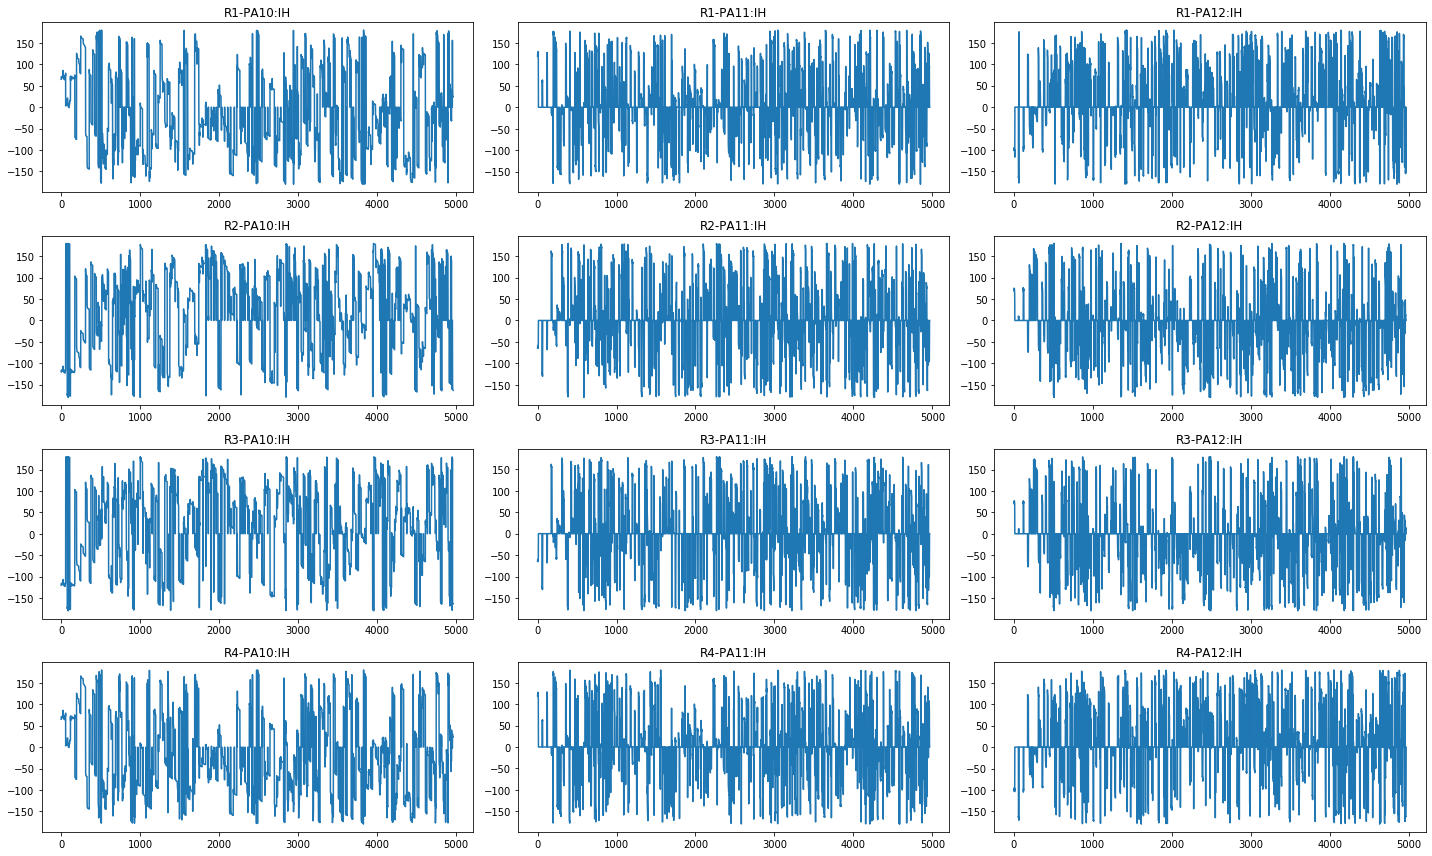

In [130]:
cols = get_col_names(col_names,'R[1-4]-PA1[0-2]:IH')

eda_feature_category(df,cols)
df[cols].describe()

### Pos. – Neg. – Zero Current Phase Magnitude 

R1-PM10:I    R1-PM11:I    R1-PM12:I    R2-PM10:I    R2-PM11:I  \
count  4966.000000  4966.000000  4966.000000  4966.000000  4966.000000   
mean    390.387644    10.245347     9.277659   393.489568     9.505434   
std     145.852655    48.421483    44.421576   145.399663    45.071974   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     318.611400     0.000000     0.000000   322.822930     0.000000   
50%     390.482075     0.000000     0.000000   394.602050     0.000000   
75%     465.419843     7.507510     7.507510   469.677150     7.324400   
max    1261.261680   580.458700   671.830590  1272.065170   560.682820   

         R2-PM12:I    R3-PM10:I    R3-PM11:I    R3-PM12:I    R4-PM10:I  \
count  4966.000000  4966.000000  4966.000000  4966.000000  4966.000000   
mean      8.032777   393.904823     9.926988     8.471658   391.782690   
std      36.019053   147.479564    47.383536    37.895368   149.550101   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000   321.358050     0.000000     0.000000   317.996085   
50%       0.000000   391.855400     0.000000     0.000000   387.883194   
75%       7.324400   468.578490     7.324400     7.141290   464.571477   
max     618.179360  1254.303500   576.247170   642.349880  1242.950680   

         R4-PM11:I    R4-PM12:I  
count  4966.000000  4966.000000  
mean      9.468018     9.256085  
std      44.729864    46.466331  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       7.295609     7.141290  
max     592.323303   677.507000

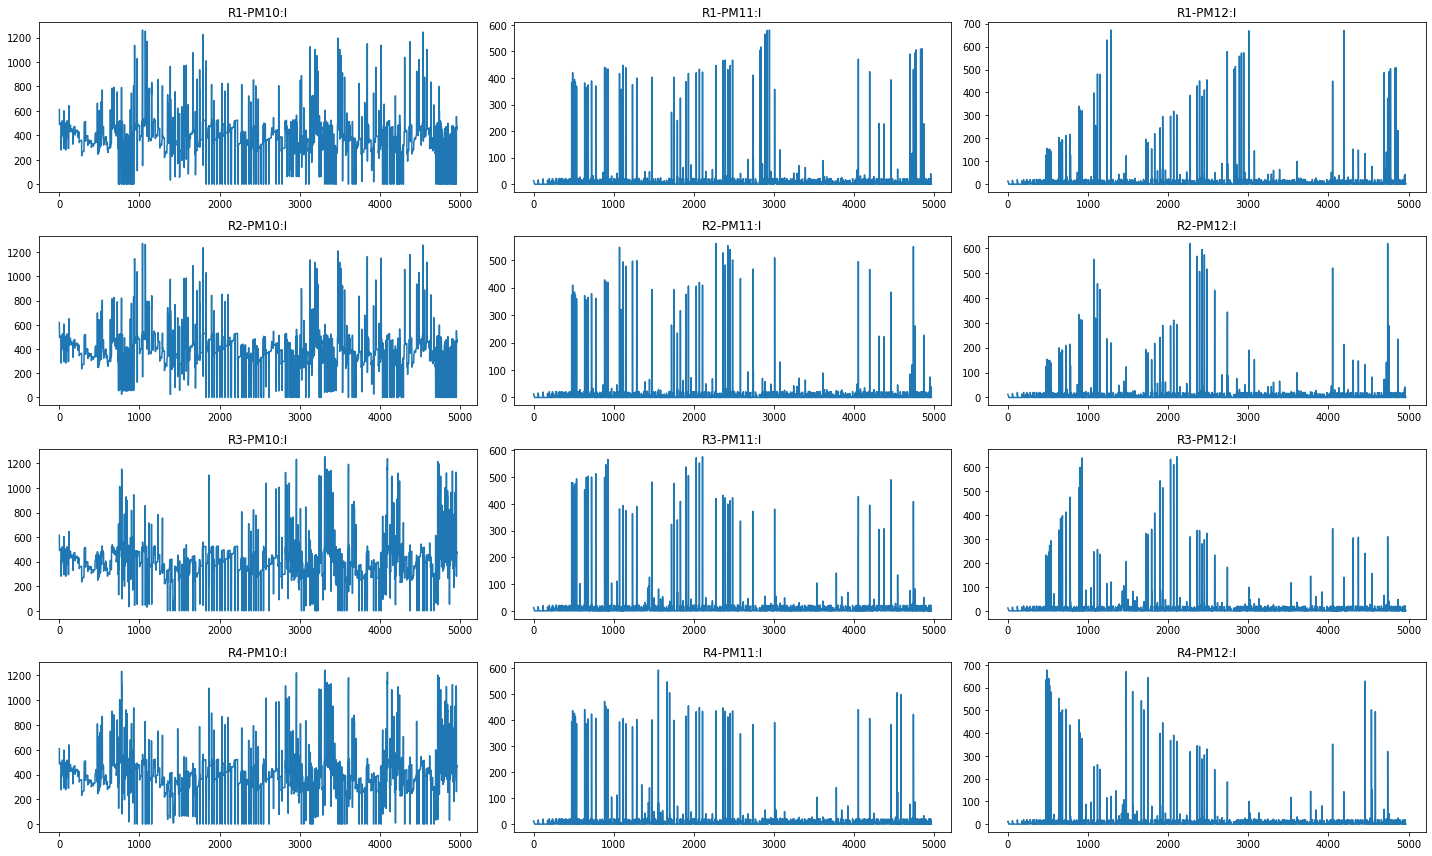

In [131]:
cols = get_col_names(col_names,'R[1-4]-PM1[0-2]:I')

eda_feature_category(df,cols)
df[cols].describe()

### Frequency for relays

R1:F         R2:F         R3:F         R4:F
count  4966.000000  4966.000000  4966.000000  4966.000000
mean     59.999648    59.992201    59.992217    59.997824
std       0.038729     0.448345     0.448107     0.052125
min      58.882000    28.755000    28.773000    57.400002
25%      59.999000    59.999000    59.999000    59.999000
50%      60.000000    60.000000    60.000000    60.000000
75%      60.000000    60.000000    60.000000    60.000000
max      61.957000    63.951000    63.958000    60.922000

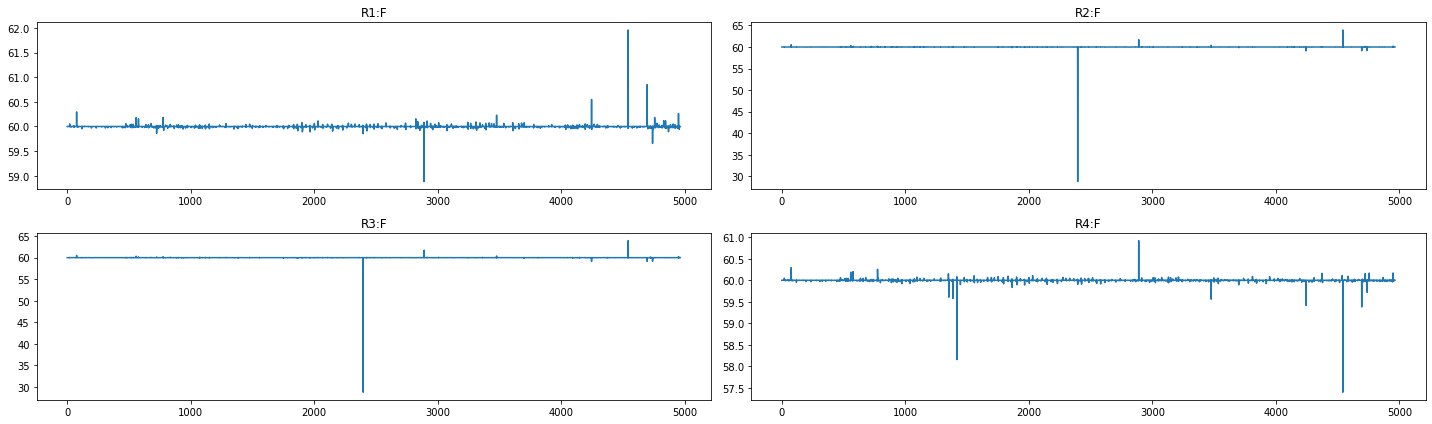

In [173]:
cols = get_col_names(col_names,'R[1-4]:F')

eda_feature_category(df,cols,2,2)
df[cols].describe()

### Frequency Delta (dF/dt) for relays

R1:DF        R2:DF        R3:DF        R4:DF
count  4966.000000  4966.000000  4966.000000  4966.000000
mean      0.001152     0.000316    -0.000121    -0.000171
std       0.088356     0.078740     0.083590     0.092691
min      -2.330000    -2.340000    -2.330000    -2.410000
25%       0.000000     0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000     0.000000
max       1.560000     1.480000     1.430000     1.830000

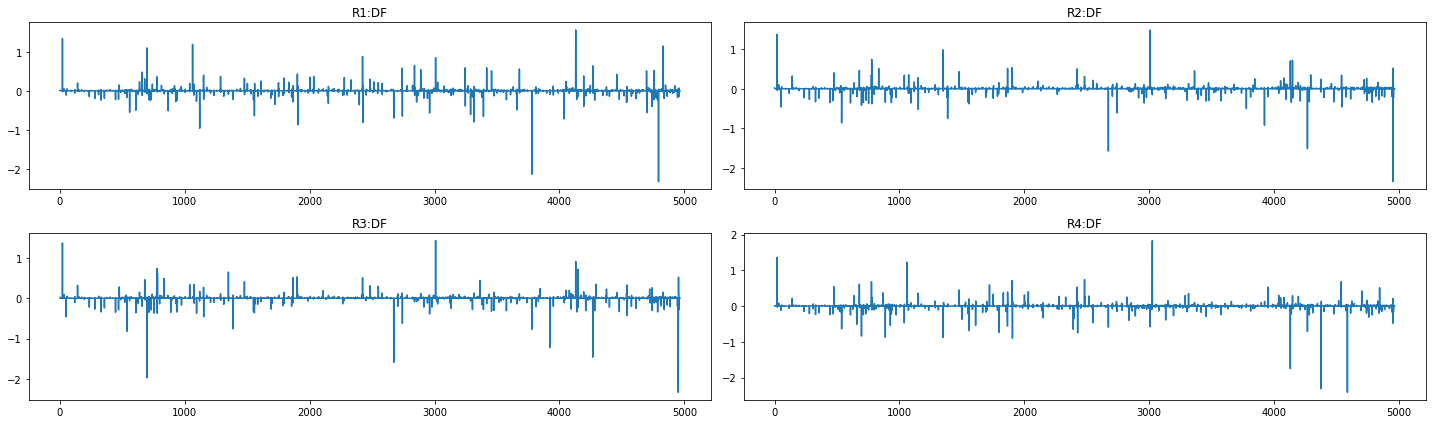

In [180]:
cols = get_col_names(col_names,'R[1-4]:DF')

eda_feature_category(df,cols,2,2)
df[cols].describe()

### Appearance Impedance for relays

R1-PA:Z     R1-PA:ZH      R2-PA:Z     R2-PA:ZH      R3-PA:Z  \
count  4774.000000  4966.000000  4796.000000  4966.000000  4813.000000   
mean     10.477981     0.023197    10.502439    -2.129666    10.506992   
std       5.004674     0.226199     6.627364     2.090454     7.490391   
min       0.206155    -2.802590     0.123195    -3.141580     0.120464   
25%       8.166445    -0.025900     7.939650    -3.082596     7.957539   
50%       9.637763     0.022291     9.405824    -3.051781     9.469832   
75%      11.976496     0.059316    11.757114    -3.003134    11.679690   
max      98.134280     3.099164   147.952843     3.141581   244.193481   

          R3-PA:ZH      R4-PA:Z     R4-PA:ZH  
count  4966.000000  4816.000000  4966.000000  
mean     -2.175889    13.270375     0.014608  
std       2.043121    55.312592     0.270753  
min      -3.141553     0.267951    -2.749102  
25%      -3.080377     8.220430    -0.025894  
50%      -3.050051     9.733030     0.021392  
75%      -3.004602    12.001410     0.059952  
max       3.141373  2012.289804     3.007521

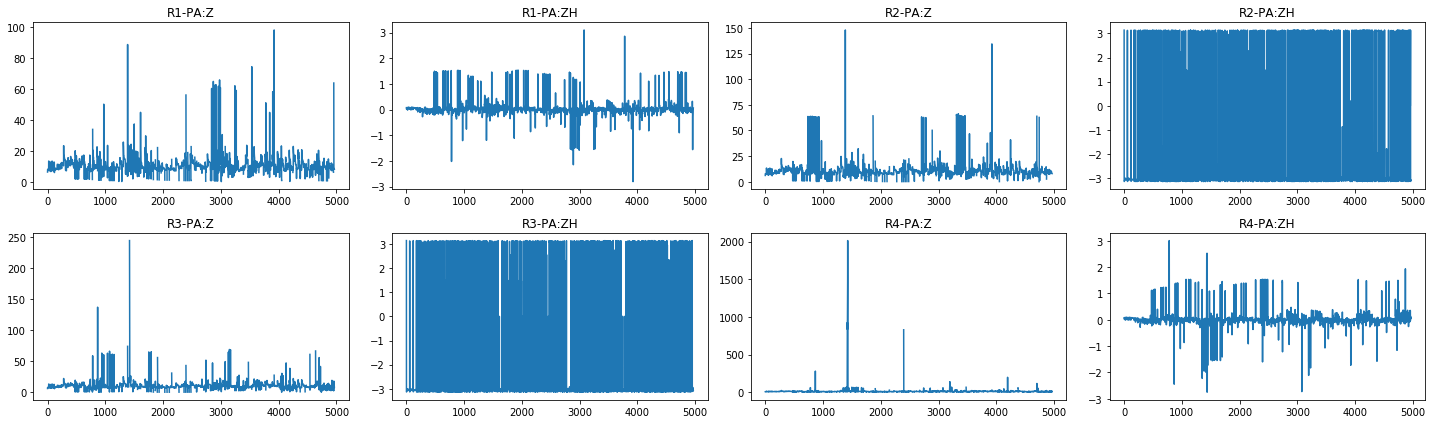

In [183]:
cols = get_col_names(col_names,'R[1-4]-PA:Z')

eda_feature_category(df,cols,2,4)
df[cols].describe()

### Appearance Impedance Angle for relays

R1-PA:ZH     R2-PA:ZH     R3-PA:ZH     R4-PA:ZH
count  4966.000000  4966.000000  4966.000000  4966.000000
mean      0.023197    -2.129666    -2.175889     0.014608
std       0.226199     2.090454     2.043121     0.270753
min      -2.802590    -3.141580    -3.141553    -2.749102
25%      -0.025900    -3.082596    -3.080377    -0.025894
50%       0.022291    -3.051781    -3.050051     0.021392
75%       0.059316    -3.003134    -3.004602     0.059952
max       3.099164     3.141581     3.141373     3.007521

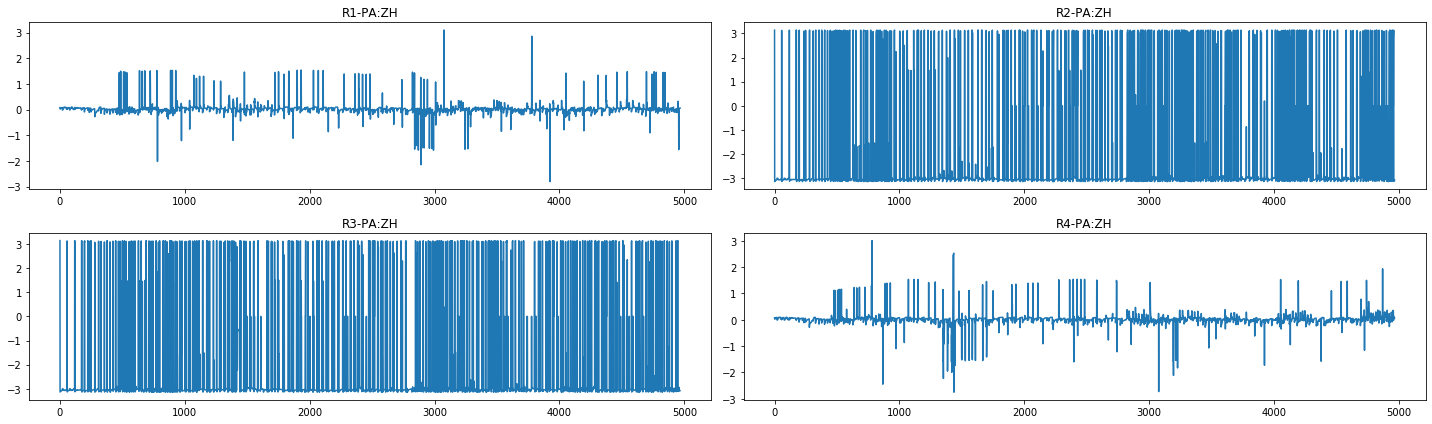

In [184]:
cols = get_col_names(col_names,'R[1-4]-PA:ZH')

eda_feature_category(df,cols,2,2)
df[cols].describe()

### Status Flag for relays

R1:S    R2:S         R3:S         R4:S
count  4966.000000  4966.0  4966.000000  4966.000000
mean     61.132904     0.0    16.908578    22.734595
std     348.836918     0.0   185.336951   214.850258
min       0.000000     0.0     0.000000     0.000000
25%       0.000000     0.0     0.000000     0.000000
50%       0.000000     0.0     0.000000     0.000000
75%       0.000000     0.0     0.000000     0.000000
max    2058.000000     0.0  2048.000000  2058.000000

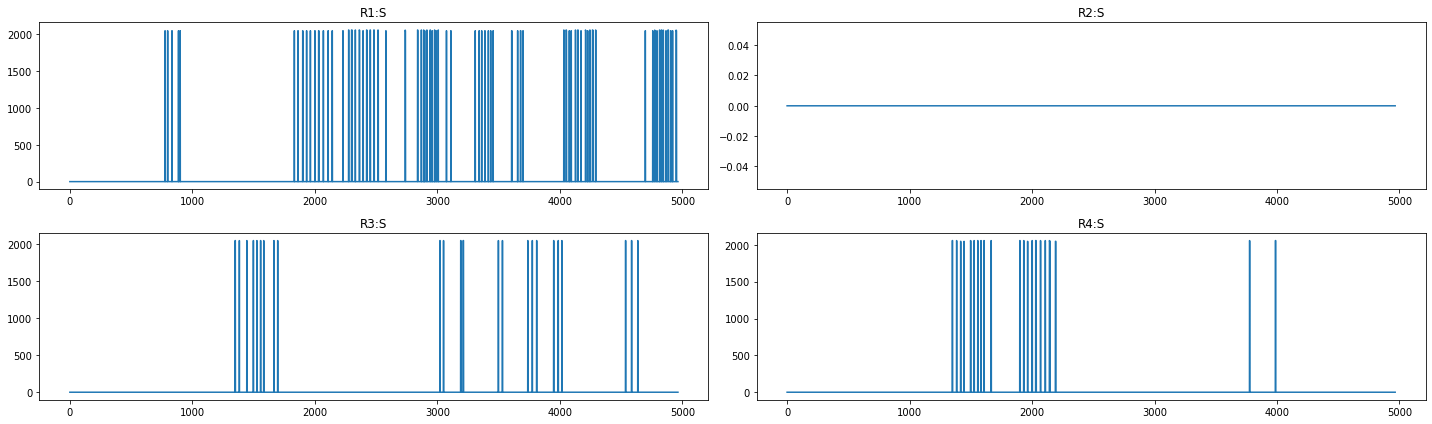

In [186]:
cols = get_col_names(col_names,'R[1-4]:S')

eda_feature_category(df,cols,2,2)
df[cols].describe()